In [30]:
!git clone https://github.com/Omkar1634/ERA_V2.git


Cloning into 'ERA_V2'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 35 (delta 0), reused 5 (delta 0), pack-reused 29
Receiving objects: 100% (35/35), 162.36 MiB | 34.96 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (22/22), done.


In [31]:
import os

print("Current Working Directory: ", os.getcwd())
os.chdir('/content/ERA_V2')
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /content/ERA_V2
Current Working Directory:  /content/ERA_V2


In [ ]:
pip install torch-lr-finder


In [32]:
import sys


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_lr_finder import LRFinder
from Dataloader.dataloder_10 import load_dataset
from Model.model_10 import Custom_Resnet,model_summary
from Training.train_10 import Trainer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [33]:
trainloader, testloader = load_dataset()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [34]:
trial_model = Custom_Resnet().to(device)
model_summary(trial_model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1, 128,

Leslie Smith's approach


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.26E-01


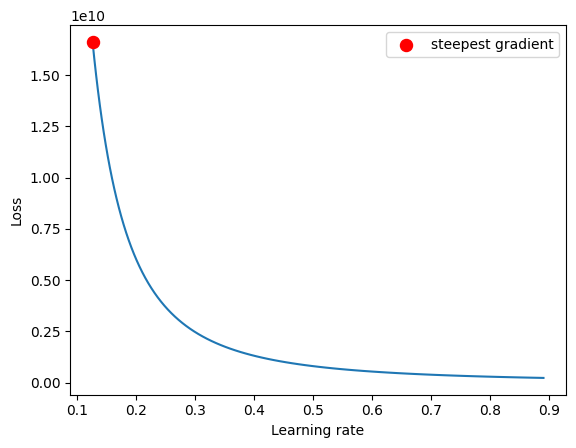

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(trial_model.parameters(), lr=0.1, weight_decay=1e-2)
lr_finder = LRFinder(trial_model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader, end_lr=1, num_iter=100, step_mode="exp")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Epoch 1/24


Loss=2.2731 Accuracy=14.58: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]



Test set: Average loss: 2.4532, Accuracy: 1177/10000 (11.77%)
Epoch 2/24


Loss=2.1017 Accuracy=23.21: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]



Test set: Average loss: 2.1241, Accuracy: 1940/10000 (19.40%)
Epoch 3/24


Loss=1.8687 Accuracy=29.17: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]



Test set: Average loss: 1.8696, Accuracy: 3009/10000 (30.09%)
Epoch 4/24


Loss=1.7340 Accuracy=36.61: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]



Test set: Average loss: 1.7277, Accuracy: 3836/10000 (38.36%)
Epoch 5/24


Loss=1.4568 Accuracy=44.35: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]



Test set: Average loss: 1.7192, Accuracy: 4353/10000 (43.53%)
Epoch 6/24


Loss=1.3033 Accuracy=53.27: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]



Test set: Average loss: 1.2283, Accuracy: 5552/10000 (55.52%)
Epoch 7/24


Loss=1.3395 Accuracy=53.27: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]



Test set: Average loss: 1.0909, Accuracy: 6095/10000 (60.95%)
Epoch 8/24


Loss=1.0878 Accuracy=61.61: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]



Test set: Average loss: 0.9531, Accuracy: 6606/10000 (66.06%)
Epoch 9/24


Loss=1.0009 Accuracy=65.18: 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]



Test set: Average loss: 1.0369, Accuracy: 6492/10000 (64.92%)
Epoch 10/24


Loss=0.8163 Accuracy=68.45: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]



Test set: Average loss: 0.8297, Accuracy: 7136/10000 (71.36%)
Epoch 11/24


Loss=0.9774 Accuracy=68.45: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]



Test set: Average loss: 0.8101, Accuracy: 7192/10000 (71.92%)
Epoch 12/24


Loss=0.8015 Accuracy=71.43: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 0.8515, Accuracy: 7163/10000 (71.63%)
Epoch 13/24


Loss=0.7526 Accuracy=73.81: 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]



Test set: Average loss: 0.6621, Accuracy: 7706/10000 (77.06%)
Epoch 14/24


Loss=0.8054 Accuracy=71.73: 100%|██████████| 98/98 [00:18<00:00,  5.16it/s]



Test set: Average loss: 0.7386, Accuracy: 7513/10000 (75.13%)
Epoch 15/24


Loss=0.6934 Accuracy=75.00: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]



Test set: Average loss: 0.6284, Accuracy: 7919/10000 (79.19%)
Epoch 16/24


Loss=0.6648 Accuracy=77.68: 100%|██████████| 98/98 [00:19<00:00,  5.16it/s]



Test set: Average loss: 0.6058, Accuracy: 7895/10000 (78.95%)
Epoch 17/24


Loss=0.7034 Accuracy=74.70: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s]



Test set: Average loss: 0.6097, Accuracy: 7959/10000 (79.59%)
Epoch 18/24


Loss=0.6501 Accuracy=76.19: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]



Test set: Average loss: 0.5187, Accuracy: 8251/10000 (82.51%)
Epoch 19/24


Loss=0.5066 Accuracy=82.44: 100%|██████████| 98/98 [00:18<00:00,  5.17it/s]



Test set: Average loss: 0.4979, Accuracy: 8329/10000 (83.29%)
Epoch 20/24


Loss=0.5678 Accuracy=81.25: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]



Test set: Average loss: 0.4847, Accuracy: 8372/10000 (83.72%)
Epoch 21/24


Loss=0.5544 Accuracy=82.14: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]



Test set: Average loss: 0.4674, Accuracy: 8415/10000 (84.15%)
Epoch 22/24


Loss=0.4918 Accuracy=83.93: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]



Test set: Average loss: 0.4504, Accuracy: 8482/10000 (84.82%)
Epoch 23/24


Loss=0.4932 Accuracy=83.04: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]



Test set: Average loss: 0.4432, Accuracy: 8532/10000 (85.32%)
Epoch 24/24


Loss=0.5668 Accuracy=80.06: 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]



Test set: Average loss: 0.4421, Accuracy: 8537/10000 (85.37%)


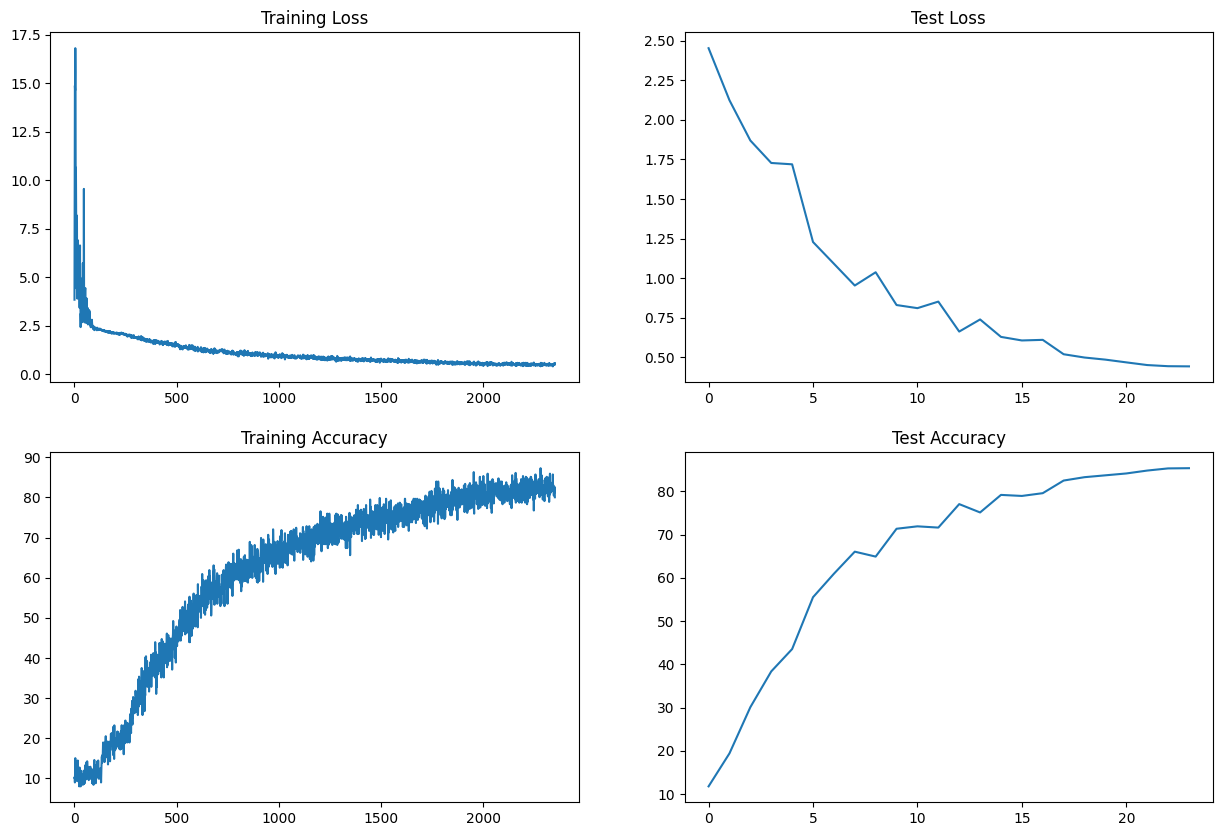

In [36]:
model =  Custom_Resnet().to(device)
trainer = Trainer(model,device,trainloader,testloader,lr_max=1.26E-01,lr_min=0.0126,epochs=24,max_at_epoch=5)
trainer.run()